# <span style="color:#F72585">Inicio Rápido</span>


## <span style="color:#4361EE">Introducción</span>

En esta lección construimos nuestra primera red neuronal con Pytorch. Usamos el famoso ejemplo [fashion mnist](https://www.kaggle.com/zalando-research/fashionmnist). En este caso tomaremos los datos directamente de la librería `tensorflow.keras.datasets`.

### <span style="color:#4CC9F0">Instalar Tensorflow</span>


En consola ejecute el siguiente comando. 

In [6]:
#conda install -c conda-forge tensorflow

Para instalar `sklearn` use el canal de Intel, que mantiene la librería actualizada

In [7]:
# conda install -c intel scikit-learn

## <span style="color:#4361EE">Carga librerías requeridas</span>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.optimizers import SGD

from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelBinarizer

## <span style="color:#4361EE">Trabajando con los datos</span>

In [2]:
# Carga el dataset CIFAR-10 
print("Cargando el dataset CIFAR-10...")
((x_train, y_train), (x_test, y_test)) = cifar10.load_data()
print('¡¡Hecho!!')

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# Escala los datos al rango [0, 1]
trainX = x_train.astype("float32") / 255.0
testX = x_test.astype("float32") / 255.0

# convierte las etiquetas de enteros a vectores (no necesario en realidad)
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

rows = x_train.shape[1]
cols = x_train.shape[2]
channels = x_train.shape[3]

Cargando el dataset CIFAR-10...
¡¡Hecho!!


In [3]:
print(len(trainY))
print(testY[0])

50000
[0 0 0 1 0 0 0 0 0 0]


### <span style="color:#4CC9F0">Una primera imagen de los datos</span>


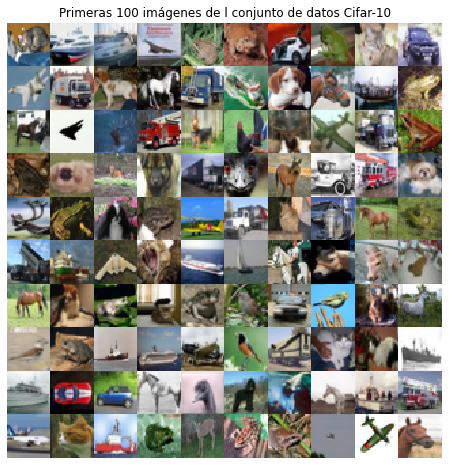

In [4]:
# Muestra las primeras 100  images en color

img_rows = rows
img_cols = cols

imgs_t = x_test[:100]
imgs_t = imgs_t.reshape((10, 10, img_rows, img_cols, channels))
imgs_t = np.vstack([np.hstack(i) for i in imgs_t])
plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Primeras 100 imágenes de l conjunto de datos Cifar-10')
plt.imshow(imgs_t, interpolation='none')
plt.savefig('./test_color.png')
plt.show()

## <span style="color:#4361EE">Creando modelos</span>

In [5]:
# define model
class NeuralNetwork(Model):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.linear_relu_stack = Sequential([
            InputLayer(input_shape=(32,32,3)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(512, activation='relu'),
            Dense(10, activation='softmax'),            
        ])
                  
    # la función call es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntete libre de usar más
    def call(self, x):
        probs = self.linear_relu_stack(x)
        return probs

model = NeuralNetwork()


### <span style="color:#4CC9F0">Optimizador, métricas y compilación del modelo</span>


In [6]:
init_lr = 1e-2
batch_size = 64
epochs = 10

optimizer = SGD(learning_rate=init_lr, momentum=0.9, decay=init_lr / epochs)

model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])


### <span style="color:#4CC9F0">Entrenamiento</span>


In [15]:
hist =  model.fit(trainX, trainY, batch_size=batch_size, 
                  validation_data=(testX, testY),
                  steps_per_epoch=trainX.shape[0] // batch_size,
                  epochs=epochs, verbose=1)

Epoch 1/10
781/781 [==============================] - 23s 30ms/step - loss: 1.2581 - accuracy: 0.5558 - val_loss: 1.3477 - val_accuracy: 0.5243
Epoch 2/10
781/781 [==============================] - 23s 29ms/step - loss: 1.2431 - accuracy: 0.5621 - val_loss: 1.3730 - val_accuracy: 0.5111
Epoch 3/10
781/781 [==============================] - 22s 28ms/step - loss: 1.2260 - accuracy: 0.5695 - val_loss: 1.3280 - val_accuracy: 0.5284
Epoch 4/10
781/781 [==============================] - 22s 28ms/step - loss: 1.2104 - accuracy: 0.5733 - val_loss: 1.3310 - val_accuracy: 0.5318
Epoch 5/10
781/781 [==============================] - 22s 28ms/step - loss: 1.1990 - accuracy: 0.5772 - val_loss: 1.3341 - val_accuracy: 0.5310
Epoch 6/10
781/781 [==============================] - 24s 30ms/step - loss: 1.1861 - accuracy: 0.5828 - val_loss: 1.3216 - val_accuracy: 0.5357
Epoch 7/10
781/781 [==============================] - 23s 29ms/step - loss: 1.1740 - accuracy: 0.5865 - val_loss: 1.3188 - val_accuracy:

## <span style="color:#4361EE">Guardando y recuperando el modelo</span>

Necesitamos instalar

In [ ]:
#!conda install -c anaconda pyyaml h5py

### <span style="color:#4CC9F0">Guarda el modelo</span>


Cuando corra el cuaderno localmente, use el siguiente comando para guardarlo

````{tab} Python
```python
mis_pesos = '../Checkpoints/Model_0_tf'
model.save_weights(mis_pesos)
```
````


### <span style="color:#4CC9F0">Crea un nuevo modelo con mis pesos almacenados</span>


````{tab} Python
```python
model_1 = NeuralNetwork()
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
model_1.load_weights(mis_pesos)
```
````


## <span style="color:#4361EE">Evaluación del modelo</span>

In [11]:
# Evalua el modelo original 
loss, acc = model.evaluate(testX, testY, verbose=2)

print("Exactitud del modelo original accuracy: {:5.2f}%".format(100 * acc))

313/313 - 3s - loss: 1.3708 - accuracy: 0.5143 - 3s/epoch - 9ms/step
Exactitud del modelo original accuracy: 51.43%


In [31]:

model_1=NeuralNetwork()
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

model_1.load_weights(model)

AttributeError: 'NeuralNetwork' object has no attribute 'endswith'

In [10]:
# Evalua el modelo restaurado
loss, acc = model_1.evaluate(testX, testY, verbose=2)

print("Exactitud del modelo restaurado accuracy: {:5.2f}%".format(100 * acc))

313/313 - 3s - loss: 1.3708 - accuracy: 0.5143 - 3s/epoch - 8ms/step
Exactitud del modelo restaurado accuracy: 51.43%


In [25]:
predictions = model.predict(testX)

313/313 [==============================] - 3s 10ms/step


## <span style="color:#4361EE">Predicción</span>

In [26]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(testY[0])

[0.04558412 0.06122134 0.03857893 0.49717635 0.10958219 0.09021669
 0.01830608 0.00147913 0.13623646 0.00161872]
3
[0 0 0 1 0 0 0 0 0 0]


In [27]:
assert np.argmax(predictions[0]) == np.argmax(testY[0])